# Network Intrusion Detection - EDA

Here, we analysed the data to find any discrepancies, interesting patterns, coorrelation in data, etc. This step is also popularly known as Exploratory Data Analysis.



## Dataset
* `training.csv`: Training data containing 42 features and 1 column of groundtruths.
* `testing.csv`: Testing data containing 42 features and no labels.

In order to test the generalization ability of the classifers, I'll use <code>training.csv</code> only. That is, <code>testing.csv</code> won't be used.

In [25]:
# Import packages
import os 
import warnings
import gc
import seaborn as sns
import pandas as pd 
import numpy as np 
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Configuration
warnings.simplefilter('ignore')
pd.set_option('max_columns', 50)

In [26]:
# Variable definitions
DATA_PATH = "./intrusion-classification"

In [27]:
# Utility functions 
def describe(df, stats):
    '''Describe the basic information of the raw dataframe.
    
    Parameters:
        df: pd.DataFrame, raw dataframe to be analyzed
        stats: boolean, whether to get descriptive statistics 
    
    Return:
        None
    '''
    df_ = df.copy(deep=True)   # Copy of the raw dataframe
    n_features = df_.shape[1]
    if n_features > pd.get_option("max_columns"):
        # If the feature (column) number is greater than max number of columns displayed
        warnings.warn("Please reset the display-related options max_columns \
                      to enable the complete display.", 
                      UserWarning) 
    print("===== Basic information =====")
    display(df_.info())
    get_nan_ratios(df_)
    if stats:
        print("===== Description =====")
        numeric_col_num = df_.select_dtypes(include=np.number).shape[1]   # Number of cols in numeric type
        if numeric_col_num != 0:
            display(df_.describe())
        else:
            print("There's no description of numeric data to display!")
    del df_
    gc.collect()

def get_nan_ratios(df):
    '''Get NaN ratios of columns with NaN values.
    
    Parameters:
        df: pd.DataFrame, raw dataframe to be analyzed
        
    Return:
        None
    '''
    df_ = df.copy()   # Copy of the raw dataframe
    nan_ratios = df_.isnull().sum() / df_.shape[0] * 100   # Ratios of value nan in each column
    nan_ratios = pd.DataFrame([df_.columns, nan_ratios]).T   # Take transpose 
    nan_ratios.columns = ["Columns", "NaN ratios"]
    nan_ratios = nan_ratios[nan_ratios["NaN ratios"] != 0.0]
    print("===== NaN ratios of columns with NaN values =====")
    if len(nan_ratios) == 0:
        print("There isn't any NaN value in the dataset!")
    else:
        display(nan_ratios)
    del df_
    gc.collect() 

In [41]:
df = pd.read_csv(os.path.join(DATA_PATH, "training.csv"))
X, y = df.iloc[:, :-1], df['target']

In [43]:
import warnings
warnings.filterwarnings('ignore')

# map nomarl with 0, inrusion attack with 1
for idx in range(len(y)):
    if y[idx] == 1:
        y[idx] = 0
    else:
        y[idx] = 1

In [44]:
y

0         1
1         1
2         0
3         0
4         0
         ..
449935    0
449936    0
449937    0
449938    1
449939    1
Name: target, Length: 449940, dtype: int64

# 1. Exploratory Data Analysis


## *1.1 Basic Description*
Basic information about the training data is shown, including:
* Data appearance
* Data types of features
* etc.

In [45]:
print("===== DataFrame: Training Features=====")
display(X.head())
describe(X, stats=True)

===== DataFrame: Training Features=====


,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,7,0.0,0.0,1.0,1.0,0.06,0.08,0.00,255,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0
1,2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
2,3,0,tcp,http,SF,302,1023,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,9,0.0,0.0,0.0,0.0,1.00,0.00,0.22,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,4,0,udp,ntp_u,SF,48,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,111,9,0.08,0.02,0.08,0.00,0.0,0.0,0.0,0.0
4,5,0,tcp,http,SF,334,2096,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,8,0.0,0.0,0.0,0.0,1.00,0.00,0.25,32,255,1.00,0.00,0.03,0.03,0.0,0.0,0.0,0.0


===== Basic information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449940 entries, 0 to 449939
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           449940 non-null  int64  
 1   duration                     449940 non-null  int64  
 2   protocol_type                449940 non-null  object 
 3   service                      449940 non-null  object 
 4   flag                         449940 non-null  object 
 5   src_bytes                    449940 non-null  int64  
 6   dst_bytes                    449940 non-null  int64  
 7   land                         449940 non-null  int64  
 8   wrong_fragment               449940 non-null  int64  
 9   urgent                       449940 non-null  int64  
 10  hot                          449940 non-null  int64  
 11  num_failed_logins            449940 non-null  int64  
 12  logged_in                   

None

===== NaN ratios of columns with NaN values =====
There isn't any NaN value in the dataset!
===== Description =====


,Id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,449940.000000,449940.000000,4.499400e+05,4.499400e+05,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.0,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000,449940.000000
mean,224970.500000,101.361584,2.404301e+03,1.930000e+03,0.000020,0.000433,0.000011,0.042986,0.001376,0.392723,0.033193,0.000196,0.000098,0.042381,0.003356,0.000173,0.002498,0.0,0.000004,0.003512,172.322267,152.393266,0.043147,0.043286,0.104987,0.105088,0.880059,0.021081,0.070698,198.070198,198.001176,0.807404,0.039686,0.400109,0.014445,0.043468,0.043021,0.106085,0.105061
std,129886.634396,1013.034519,3.324546e+05,3.818005e+04,0.004472,0.030440,0.003944,0.889954,0.037483,0.488357,11.467972,0.013984,0.012824,11.522881,0.258951,0.013662,0.054760,0.0,0.002108,0.059155,216.280687,219.612392,0.200716,0.201940,0.305121,0.305530,0.309481,0.106318,0.210863,92.731189,96.862038,0.363463,0.143706,0.470276,0.052955,0.200441,0.201514,0.303094,0.302618
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112485.750000,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,136.750000,170.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,224970.500000,0.000000,2.940000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,19.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,337455.250000,0.000000,1.032000e+03,6.070000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,509.000000,509.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.010000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000
max,449940.000000,54451.000000,2.172773e+08,7.068759e+06,1.000000,3.000000,2.000000,101.000000,3.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,2.000000,7.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We identified various features with binary values and a few with redundancy.
- A few features have object data type that need to be encoded into numerical values.
Also, few features have high scale difference and need to normalised.

## *1.2 Features Analysis* 

We plot various graphs to identify distributions, relationships or any pattern that is not visible by seeing raw data.

### 1.2.1 Unique Values

In [46]:
cat_features = ['protocol_type', 'service', 'flag']
for f in cat_features:
    print(f"=====Unique values of {f}=====")
    unique_vals = X[f].unique()
    print(unique_vals)
    print(f"Number of unique values: {len(unique_vals)}\n")

=====Unique values of protocol_type=====
['tcp' 'icmp' 'udp']
Number of unique values: 3

=====Unique values of service=====
['private' 'ecr_i' 'http' 'ntp_u' 'ftp_data' 'finger' 'other' 'pop_3'
 'smtp' 'ftp' 'eco_i' 'domain_u' 'supdup' 'discard' 'auth' 'bgp' 'Z39_50'
 'shell' 'netbios_ns' 'hostnames' 'telnet' 'uucp_path' 'mtp' 'http_443'
 'nnsp' 'time' 'urp_i' 'exec' 'iso_tsap' 'netbios_dgm' 'name' 'systat'
 'IRC' 'ldap' 'netstat' 'printer' 'link' 'gopher' 'ssh' 'efs' 'sunrpc'
 'daytime' 'X11' 'imap4' 'pop_2' 'uucp' 'whois' 'rje' 'sql_net' 'kshell'
 'vmnet' 'login' 'ctf' 'domain' 'echo' 'csnet_ns' 'courier' 'klogin'
 'urh_i' 'netbios_ssn' 'nntp' 'tim_i' 'remote_job' 'icmp' 'red_i' 'tftp_u']
Number of unique values: 66

=====Unique values of flag=====
['REJ' 'SF' 'S0' 'RSTO' 'S2' 'RSTR' 'S1' 'OTH' 'SH' 'S3' 'RSTOS0']
Number of unique values: 11



### 1.2.2 Ratio of Each Unique Value

In [47]:
for f in cat_features:
    val_counts = X[f].value_counts()
    fig = go.Figure()
    fig.add_trace(go.Pie(
        labels=val_counts.index,
        values=val_counts
    ))
    fig.update_traces(textposition='inside') 
    fig.update_layout(
        title=f"Pie Chart of {f}",
        uniformtext_minsize=12, 
        uniformtext_mode='hide'
    )
    fig.show()

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

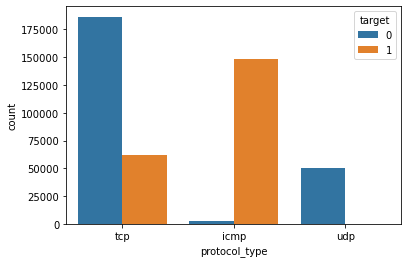

In [48]:
sns.countplot(X['protocol_type'], hue=y)

<AxesSubplot:xlabel='flag', ylabel='count'>

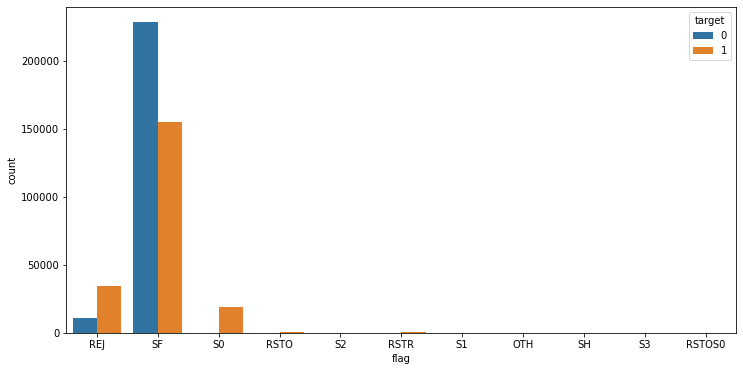

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(X['flag'], hue=y)

### 1.2.2 Ratio of other numeric values

<AxesSubplot:xlabel='count'>

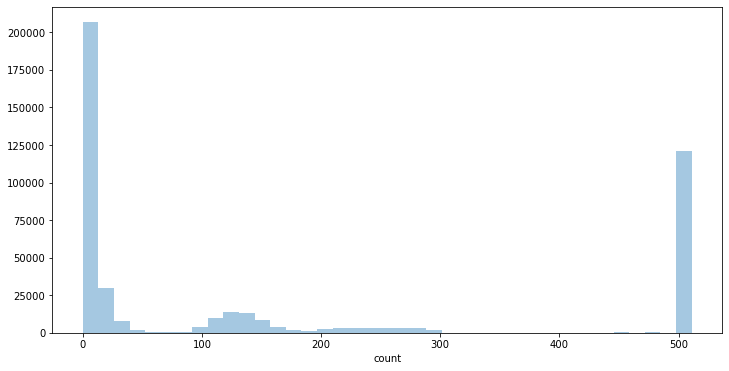

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(X['count'], kde=False)

<AxesSubplot:xlabel='dst_host_srv_count', ylabel='Density'>

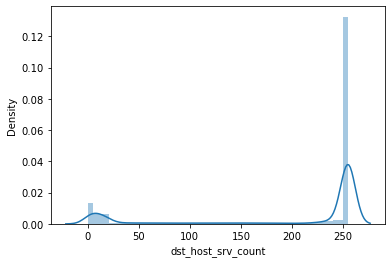

In [51]:
sns.distplot(X.dst_host_srv_count)

### 1.2.3 Groundtruth Distribution
In the final part of the EDA, let's take a look at the distribution of the groundtruths to see if there's a problem of **Class Imbalance**.

In [52]:
class_count = pd.DataFrame(y).value_counts()
fig = go.Figure()
fig.add_trace(go.Pie(
    labels=class_count.index,
    values=class_count
))
fig.update_traces(textposition='inside') 
fig.update_layout(
    title=f"Pie Chart of Groundtruths",
    uniformtext_minsize=12, 
    uniformtext_mode='hide'
)
fig.show()

### Observations from Data Analysis
- We identified a slight imbalance in the target column "target" of our dataset. But it is not significant, otherwise we could go for oversampling.
- 55.2% of traffic belongs TCP while 33.6% belongs to ICMP and rest to UDP.
- Most of the ICMP traffic had anomaly; most of the UDP traffic was normal; while the distribution of normal connections is sligtly higher in case of TCP.
- The traffic distribution on the basis of flags was also uneven where most of it had SF(Sign Flag).
- Most of the traffic with SF was normal, while that had S0 and REJ flag had anomaly.
- Most of the traffic recorded was unique.
- Count of most of the connections having the same destination host and using the same service was either very low or very high.

<AxesSubplot:>

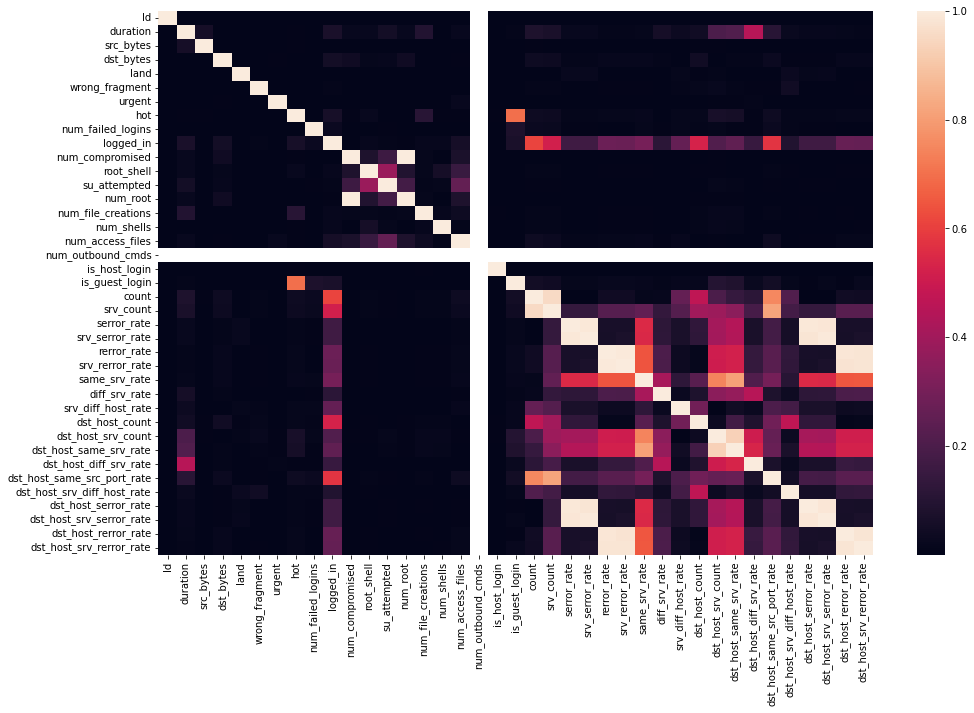

In [55]:
# Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(X.corr().apply(abs))

In [54]:
corr_with_target = X.corrwith(y).apply(abs)
corr_with_target[corr_with_target>0.7]

logged_in    0.707370
count        0.803544
dtype: float64

- From the above correlation heatmap, we can see that most of the data has very low correlation. This is a good characterstic for our Machine Learning Process.
- Few features had high correlation with our target class namely,logged_in, count, which will be helpful for our model.